# OE_wavs
A notebook to visualise sound for the OpenEars Sound Sensor.

This notebook visualises samples taken with the OE sound sensor.
Samples were taken in 1 september 2021 in the evening, as indicated in the file names (unix time stamps).
The samples are checked and do not contain sensitive data. (so privacy is preserved)

In the notebook we show the following graphs:
1. Root Mean Square Energy
2. Spectrogram (SFTF) with log scale
3. Waveform

In [3]:
#import all packages
from glob import glob
import IPython
import librosa
import librosa.display
import numpy as np

In [4]:
oe_wavs=glob('*.wav')
print(oe_wavs)

['record_1630520911.wav', 'record_1630521211.wav', 'record_1630521001.wav', 'record_1630521271.wav', 'record_1630520971.wav', 'record_1630521061.wav', 'record_1630521091.wav', 'record_1630520761.wav', 'record_1630520941.wav', 'record_1630520821.wav', 'record_1630521121.wav', 'record_1630521241.wav', 'record_1630521151.wav', 'record_1630521031.wav', 'record_1630520851.wav', 'record_1630520881.wav', 'record_1630521181.wav']


In [26]:
#select file
audio_path = oe_wavs[2]

In [27]:
print(audio_path)
IPython.display.Audio(audio_path)

record_1630521001.wav


In [23]:
#some basic data
#load the file and print some data
y, sr = librosa.load(audio_path, sr=None)
print(f'shape y: {y.shape[0]}')
print(f'sample rate: {sr}')
x= y.shape[0]/sr
print (f'length sample: {x} seconds')

shape y: 480000
sample rate: 16000
length sample: 30.0 seconds


In [24]:
#getting the formula for the RMS Energy calculation
#source: https://librosa.org/doc/main/generated/librosa.feature.rms.html
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)
print(rms[0:1])

[[0.01453507 0.01747917 0.01635652 0.02220467 0.0208329  0.01707903
  0.02144604 0.0224492  0.01549778 0.01366712 0.01450666 0.01862289
  0.01841511 0.01448544 0.0151226  0.02195475 0.019469   0.01656324
  0.0154378  0.01386185 0.01599131 0.01814171 0.01422662 0.01627024
  0.0123925  0.01674521 0.02010802 0.01278653 0.01551144 0.018114
  0.01957154 0.01852148 0.01432865 0.01915933 0.01937208 0.01710328
  0.01828449 0.01728743 0.01504606 0.01756239 0.01606526 0.01685591
  0.01980459 0.02040419 0.0225526  0.0222602  0.01746009 0.01819511
  0.01824886 0.01902356 0.01996798 0.0188103  0.01483702 0.01742253
  0.0172858  0.0145541  0.01537035 0.01561193 0.01585858 0.01560324
  0.01573566 0.01453721 0.01937098 0.02075491 0.01438893 0.01441106
  0.01711811 0.01608557 0.0164224  0.01958049 0.02514559 0.02431502
  0.02274932 0.01925842 0.01657978 0.01612895 0.01849932 0.01974772
  0.01808963 0.01781273 0.01855141 0.01737268 0.0147123  0.01450658
  0.01355557 0.01216102 0.01645996 0.02063982 0.02

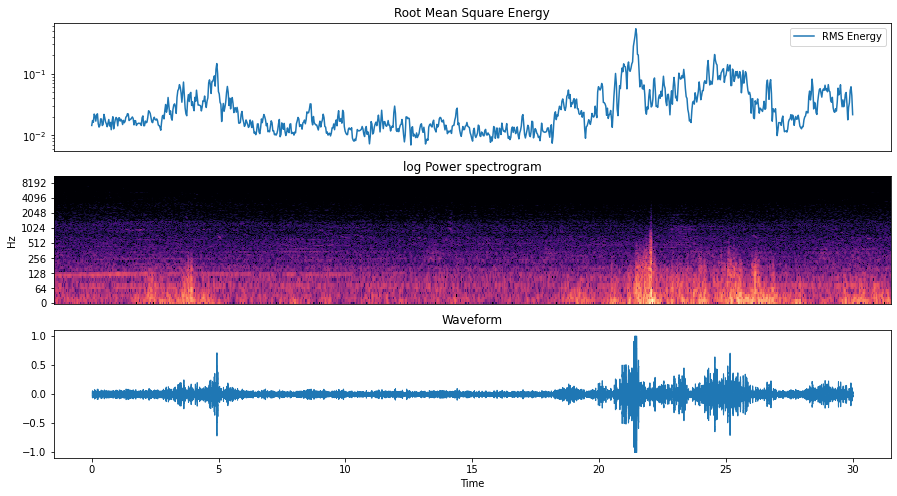

In [25]:
#visualise sound
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3, figsize=(15,8))
#plotting the RMS Energy
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)
times = librosa.times_like(rms)
ax[0].set(title= 'Root Mean Square Energy')
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', ax=ax[1])
#Plotting the spectrogram with Short term Fourier Transform
ax[1].set(title='log Power spectrogram')
S = librosa.magphase(librosa.stft(y, window=np.ones, center=False))[0]
#Plotting the waveform
ax[2].set(title= 'Waveform')
librosa.display.waveshow(y, sr=sr)
#plotting the graph
plt.show()
IPython.display.Audio(audio_path)